In [13]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('Kolbotn_driftsdata.csv')

print(data.columns)


Index(['Tid', 'Til bane 1', 'Fra bane 1', 'Til bane 2', 'Fra bane 2',
       '3201-RT402', '3201-RT502', 'Temperatur ned i 40 brønner',
       'Temperatur opp fra 40 brønner', 'Temperatur ned i 20 brønner',
       'Temperatur opp fra 20 brønner',
       'Temperatur opp fra alle brønner (hovedrør)',
       'Turtemperatur VP (varm side)', '3201-RT501',
       'Temperatur ut fra varmepumpe (kald side)',
       'Temperatur inn til varmepumpe (kald side)',
       'Temperaturføler i brønn (ytre)', 'Temperaturføler i brønn (midten)',
       'Trykkmåler (banekrets) (pascal)', 'BC-RN001',
       'Energi levert fra varmepumpe', 'Tilført energi - Bane 1',
       'Tilført energi - Bane 2', 'Utetemperatur', 'CO2 - Bane 1',
       'Strømforbruk', 'Tidsverdier', 'Tilført effekt - Bane 1',
       'Tilført effekt - Bane 2', 'Tilført effekt - Varmepumpe', 'COP',
       'Strømforbruk_akkumulert'],
      dtype='object')


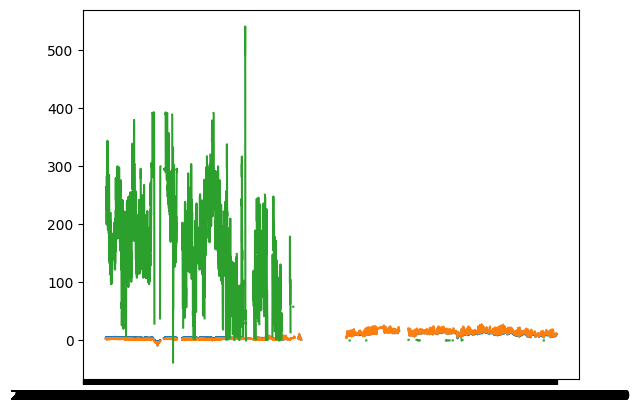

In [14]:
power_to_HP = data['Tilført effekt - Varmepumpe']

plt.plot(data['Tid'], data['Til bane 1'])
plt.plot(data['Tid'], data['Fra bane 1'])
plt.plot(data['Tid'], data['Tilført effekt - Bane 1'])
plt.show()

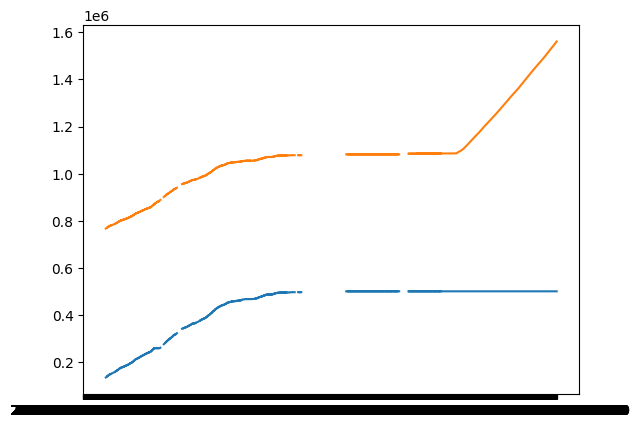

In [15]:
plt.plot(data['Tid'], data['Tilført energi - Bane 1'])
plt.plot(data['Tid'], data['Energi levert fra varmepumpe'])
plt.show()